In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import warnings
import numpy as np

warnings.filterwarnings('ignore')
%matplotlib inline



In [0]:
df = pd.read_csv('hollywood_profit.csv', sep=';')

In [3]:
print('\n rows & columns :',df.shape, '\n')
df.head()


 rows & columns : (1011, 28) 



,Name of the Movie,IMDB,Critics(CRS),Dir_Nominated,Dir_Prized,Writ_Nominated,Writ_Prize,Act_Nominated,Acto_Prized,Action,Animation,Comedy,Drama,Other,G,PG,PG-13,R,Production Budget (PB),Box Office(US),Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27
0,The Survivalist,"6,3",77.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1293300,33973,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Furious 7,"7,7",67.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,190000000,350034110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Star Wars: the Force Awakens,"8,1",81.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,245000000,936627416,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Mad Max :Fury Road,"8,1",90.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,150000000,153629485,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,50 Shades of Gray,"4,1",46.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,40000000,166147885,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
null_cols=df.isnull().sum()
drop_percentage=round(null_cols[null_cols>0]/df.shape[0]*100,2)
drop_percentage

#checking the percentage of null values in each column

Name of the Movie          74.28
IMDB                       74.28
Critics(CRS)               74.28
Dir_Nominated              74.28
Dir_Prized                 74.28
Writ_Nominated             74.28
Writ_Prize                 74.28
Act_Nominated              74.28
Acto_Prized                74.28
Action                     74.28
Animation                  74.28
Comedy                     74.28
Drama                      74.28
Other                      74.28
G                          74.28
PG                         74.28
PG-13                      74.28
R                          74.28
Production Budget (PB)     74.28
Box Office(US)             74.28
Unnamed: 20               100.00
Unnamed: 21               100.00
Unnamed: 22               100.00
Unnamed: 23               100.00
Unnamed: 24               100.00
Unnamed: 25               100.00
Unnamed: 26               100.00
Unnamed: 27               100.00
dtype: float64

In [5]:
drop_cols=drop_percentage[drop_percentage>75].index
print(drop_cols)
# creating a list of the columns that have more than 75% of missing values to then drop them

Index(['Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27'],
      dtype='object')


In [0]:
df=df.drop(drop_cols,axis=1)

In [7]:
print('\n rows & columns :',df.shape, '\n')
df.head()


 rows & columns : (1011, 20) 



,Name of the Movie,IMDB,Critics(CRS),Dir_Nominated,Dir_Prized,Writ_Nominated,Writ_Prize,Act_Nominated,Acto_Prized,Action,Animation,Comedy,Drama,Other,G,PG,PG-13,R,Production Budget (PB),Box Office(US)
0,The Survivalist,"6,3",77.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1293300,33973
1,Furious 7,"7,7",67.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,190000000,350034110
2,Star Wars: the Force Awakens,"8,1",81.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,245000000,936627416
3,Mad Max :Fury Road,"8,1",90.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,150000000,153629485
4,50 Shades of Gray,"4,1",46.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,40000000,166147885


In [8]:
df.columns

Index(['Name of the Movie', 'IMDB', 'Critics(CRS)', 'Dir_Nominated',
       'Dir_Prized', 'Writ_Nominated', 'Writ_Prize', 'Act_Nominated',
       'Acto_Prized', 'Action', 'Animation', 'Comedy', 'Drama', 'Other', 'G',
       'PG', 'PG-13', 'R', 'Production Budget (PB)', 'Box Office(US)'],
      dtype='object')

In [9]:
#renaming some columns, dropping some others I deem no relevant

df.rename(columns= {"Name of the Movie":"Movie",
                    "Critics(CRS)":"Press Rating",
                    "IMDB":"IMDB Rating",
                    "Production Budget (PB)":"Budget",
                    'Box Office(US)':'US_Gross'}, inplace=True)

df.head()



,Movie,IMDB Rating,Press Rating,Dir_Nominated,Dir_Prized,Writ_Nominated,Writ_Prize,Act_Nominated,Acto_Prized,Action,Animation,Comedy,Drama,Other,G,PG,PG-13,R,Budget,US_Gross
0,The Survivalist,"6,3",77.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1293300,33973
1,Furious 7,"7,7",67.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,190000000,350034110
2,Star Wars: the Force Awakens,"8,1",81.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,245000000,936627416
3,Mad Max :Fury Road,"8,1",90.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,150000000,153629485
4,50 Shades of Gray,"4,1",46.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,40000000,166147885


created columns to differenciate when actors are nominated for or won an award than when directors and writers do. 

Since a nomination to an award is a big recognition in itself, I feel ok to merge nominations and wins together.

The goal is to check whether having talented actors in a movie has more influence on the movie revenue than having talented writers and or directors or not.


In [0]:
conditions = [df['Writ_Nominated'] == 1,df['Dir_Nominated'] == 1,df.Dir_Prized ==1,df.Writ_Prize==1]
outputs = [1,1,1,1]

df['DirWri_Awarded'] = np.select(conditions, outputs, 0)

In [0]:
conditions1 = [df['Acto_Prized'] == 1,df['Act_Nominated'] == 1]
outputs1 = [1,1]

df['Act_Awarded'] = np.select(conditions1, outputs1, 0)

In [0]:
def dropping(x):
  df.drop(list(df.filter(regex = x)), axis = 1, inplace = True)
  
dropping('Prize')
dropping('Nomin')

In [14]:
df.columns

Index(['Movie', 'IMDB Rating', 'Press Rating', 'Action', 'Animation', 'Comedy',
       'Drama', 'Other', 'G', 'PG', 'PG-13', 'R', 'Budget', 'US_Gross',
       'DirWri_Awarded', 'Act_Awarded'],
      dtype='object')

In [15]:
df = df[pd.isnull(df.US_Gross) == False]
df.shape

# other NaN filter technique : 
#df = df[df['US Gross'] != 0]

(260, 16)

In [16]:
df['US_Gross']=df['US_Gross'].str.replace(" ","").astype(int)
df['Budget']=df['Budget'].str.replace(" ","").astype(int)
df['IMDB Rating']=df['IMDB Rating'].str.replace(" ","").str.replace(',','.').astype(np.float64)

df.dtypes

Movie              object
IMDB Rating       float64
Press Rating      float64
Action            float64
Animation         float64
Comedy            float64
Drama             float64
Other             float64
G                 float64
PG                float64
PG-13             float64
R                 float64
Budget              int64
US_Gross            int64
DirWri_Awarded      int64
Act_Awarded         int64
dtype: object

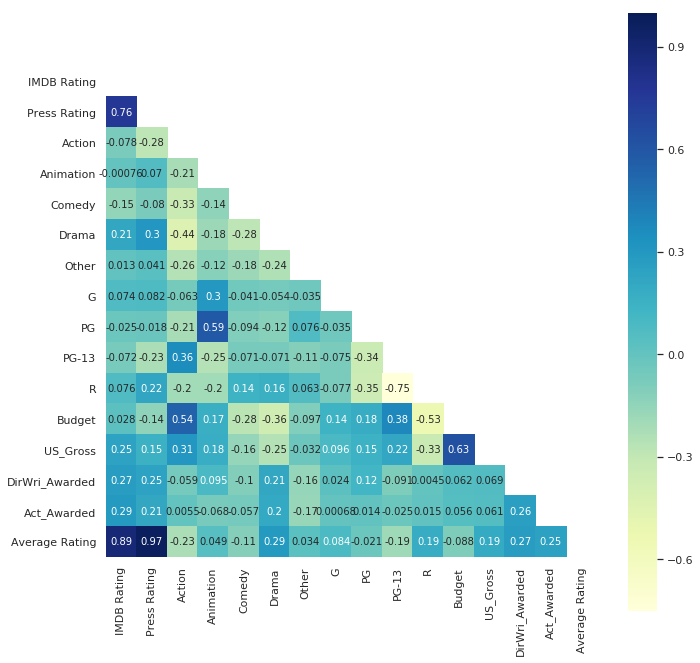

In [121]:
mask = np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
  f, ax = plt.subplots(figsize=(11, 11))
  ax = sns.heatmap(df.corr(), mask=mask, annot=True, vmax=1,cmap='YlGnBu', square=True)
plt.show()

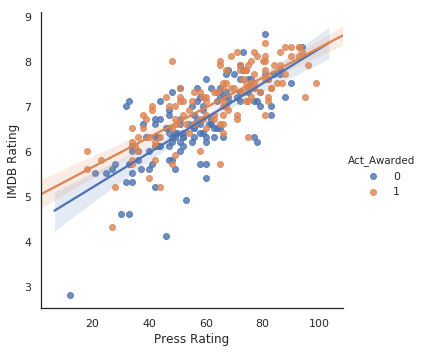

In [19]:
sns.lmplot('Press Rating','IMDB Rating',hue='Act_Awarded',data=df)
sns.set_style("white")

plt.show()
#very strong correlation

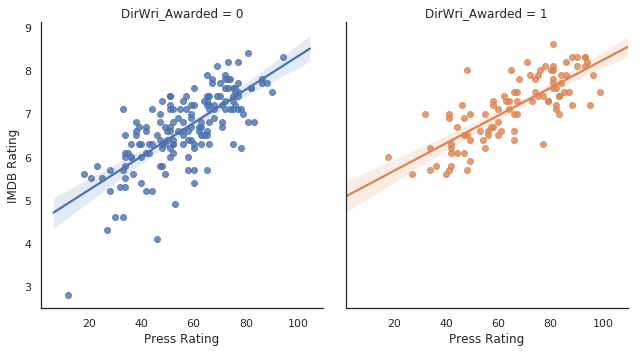

In [21]:
sns.lmplot('Press Rating','IMDB Rating', hue="DirWri_Awarded", col="DirWri_Awarded",
           data=df, height=5, aspect=.9)
sns.set_style("white")

plt.show()


movies with a director and / or a writer that have been nominated for or won an award overall got better IMDB ratings than other movies. Regarding the press rating, the distribution appears to be even.

In [0]:
df['IMDB Rating'] = df['IMDB Rating'].apply(lambda x: x*10)
# converting IMDB ratings to the same scale of that in Press Ratings

In [26]:
df.sort_values('Press Rating',inplace=True)
df.head(3)
# three least liked movies by the press

,Movie,IMDB Rating,Press Rating,Action,Animation,Comedy,Drama,Other,G,PG,PG-13,R,Budget,US_Gross,DirWri_Awarded,Act_Awarded
246,Emoji,28.0,12.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,50000000,86089513,0,0
158,Mother's day,56.0,18.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,25000000,32463917,0,1
190,Dirty Grandpa,60.0,18.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,27500000,35537564,1,1


In [28]:
df.sort_values('IMDB Rating',ascending=False,inplace=True)
df.tail(3)

,Movie,IMDB Rating,Press Rating,Action,Animation,Comedy,Drama,Other,G,PG,PG-13,R,Budget,US_Gross,DirWri_Awarded,Act_Awarded
64,Fantastic Four,43.0,27.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,120000000,56114221,0,1
4,50 Shades of Gray,41.0,46.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,40000000,166147885,0,0
246,Emoji,28.0,12.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,50000000,86089513,0,0



these are the three least liked movies by IMDB users.

IMDB users give "higher" low grades to the movies they don't like than the press. EMOJI is the only common movie in the 2 bottom three podiums.

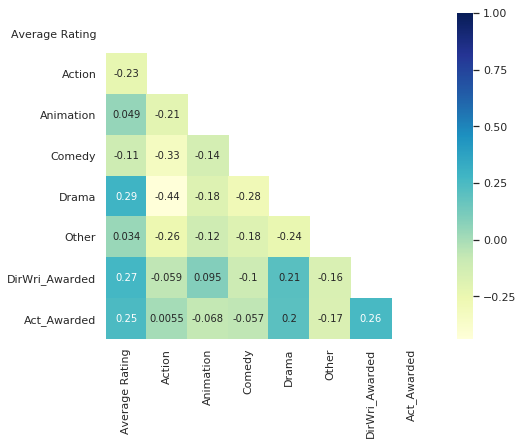

In [33]:
df['Average Rating'] = df[["IMDB Rating", "Press Rating"]].mean(axis=1)

#merging 2 columns into 1

cols = df.columns.tolist()
cols = cols[-1:] + cols[:-1]
ratings = df.ix[:, cols]

#bringing Average Rating to the beginning of the df for convenience purposes

ratings=ratings.drop(['Movie','G', 'PG', 'PG-13', 'R', 'Budget', 'US_Gross',
                      "IMDB Rating", "Press Rating"],axis=1)


mask = np.zeros_like(ratings.corr())
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
  f, ax = plt.subplots(figsize=(9, 6))
  ax = sns.heatmap(ratings.corr(), mask=mask, annot=True, vmax=1,cmap='YlGnBu', square=True)

correlation analysis:

if a movie is a drama, it is more likely to get a high average rating than if it is not. if a movie is a drama, chances are high that its writer and/or its main actor got awards in the past.

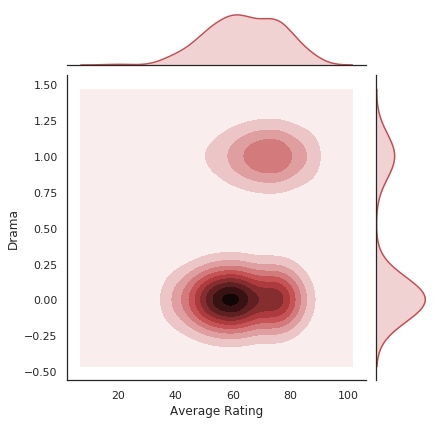

In [39]:
sns.jointplot('Average Rating','Drama', data = ratings, kind = 'kde',color='r')
plt.show()

the center of the Drama movie "cloud" is closer to 100 than that of the non-Drama movie cloud, meaning drama movies are better rated on average (75/100 for Dramas vs 60/100 for non-Drama movies)

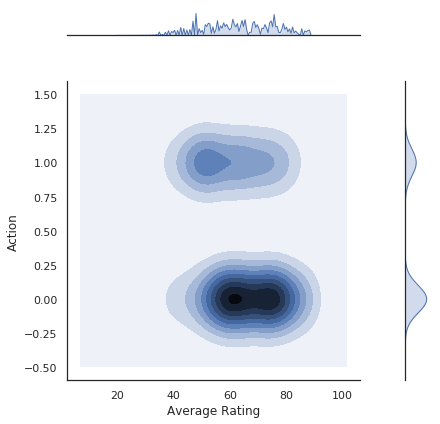

In [61]:
sns.jointplot('Average Rating','Action', data = ratings, kind = 'kde',space=2,
             marginal_kws={'lw':1, 'bw':.1})
sns.set_style("white")
#plt.text(0,0, "Action Movies' Ratings", fontsize = 14, color='Black', fontstyle='italic')

plt.show()

action movies are overall mildly appreciated

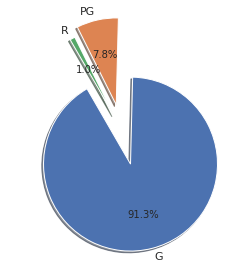

In [62]:
# animated movies
anim = df[['Animation','G','PG','PG-13','R']]
anim = anim[anim['Animation'] != 0]
anim.shape

#21 animated movies in the database

G = anim['G'].agg(sum)/anim['Animation'].agg(sum)*100
PG = anim['PG'].agg(sum)/anim['Animation'].agg(sum)
PG13= anim['PG-13'].agg(sum)/anim['Animation'].agg(sum)
R = anim['R'].agg(sum)/anim['Animation'].agg(sum)
animated = [G,PG,PG13,R]

def sd(x):
  return x*100  

percentages = [round((sd(x)),0) for x in animated]
percentages = [x for x in percentages if x != 0]
labels=['G','PG','R']
sizes=percentages
explode=(0.4,0.3,0.2)
fig1,ax1=plt.subplots()
ax1.pie(sizes,explode=explode,labels=labels,autopct='%1.1f%%',shadow=True,startangle=120)
plt.show()

pie chart of Animated movies' parental ratings. PG indicates that movies include some moments of mild violence. There's an evolution compared to the the big Disney movies that were all rated G.

assessing the movies' profitability rates :

In [68]:
profit = df[['Movie','US_Gross','Budget']]
to_convert = ['US_Gross','Budget']

def converting(x):
  profit[x]= pd.to_numeric(profit[x])

for i in to_convert:
  converting(i)

profit['Profitability'] = ((profit['US_Gross']-profit.Budget)/profit.Budget)*100

profit.Profitability = profit.Profitability.apply(lambda x : round(x,2))

profit.nsmallest(5, 'Profitability').sort_values('Profitability', ascending=False)
#the 5 least profitable movies of the dataset

,Movie,US_Gross,Budget,Profitability
146,A Monster Call,3730982,43000000,-91.32
86,By the Sea,531009,10000000,-94.69
0,The Survivalist,33973,1293300,-97.37
27,Knock Knock,34004,2500000,-98.64
72,Mr. Right,25369,8000000,-99.68


In [66]:
flops = profit.nsmallest(15, 'Profitability')
flops = flops.where(flops.Budget < 110000000)

# I chose movies that cost less than $110 million to exclude Coco from the list,
# as its final revenue was over $200 million.

flops = flops.dropna()
flops.sort_values('Budget', ascending=False)
flops.Profitability = flops.Profitability.apply(lambda x : round(x,2))
flops

,Movie,US_Gross,Budget,Profitability
72,Mr. Right,25369.0,8000000.0,-99.68
27,Knock Knock,34004.0,2500000.0,-98.64
0,The Survivalist,33973.0,1293300.0,-97.37
86,By the Sea,531009.0,10000000.0,-94.69
146,A Monster Call,3730982.0,43000000.0,-91.32
125,The Promise,8100000.0,90000000.0,-91.00
144,Live by Night,10377558.0,108000000.0,-90.39
231,T2 Trainspotting,2395410.0,18000000.0,-86.69
133,Silence,7079191.0,46000000.0,-84.61
178,Rock dog,9404922.0,60000000.0,-84.33


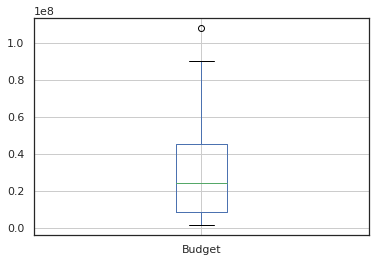

In [65]:
flops.boxplot(column='Budget')
plt.show()

the main outlier is Live by Night, but keeping it in the list is still relevant to me, since I'm analyzing the profitability rate regardless of the budget amounts.

In [69]:
profit.nlargest(5, 'Profitability').sort_values('Profitability', ascending=False)
#the 5 most profitable movies of the list

,Movie,US_Gross,Budget,Profitability
207,Get Out,175484140,5000000,3409.68
120,Moonlight,27850912,1500000,1756.73
100,Split,138120085,9000000,1434.67
75,"Hello, My name is Dorith",14443077,1000000,1344.31
185,Lights out,67235683,4900000,1272.16


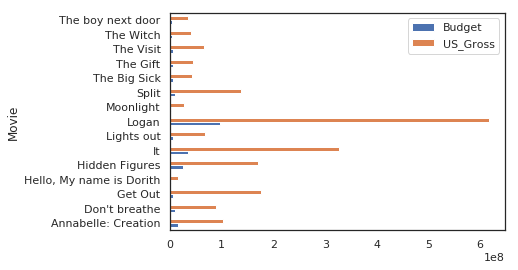

In [73]:
tops = profit.nlargest(15, 'Profitability')
tops[['Budget','US_Gross', 'Movie']].groupby(['Movie']).agg('mean').plot.barh()

plt.show()

Logan and It were 2 huge blockbusters, so I chose to remove them to better visualize the profitability rates of the other movies.

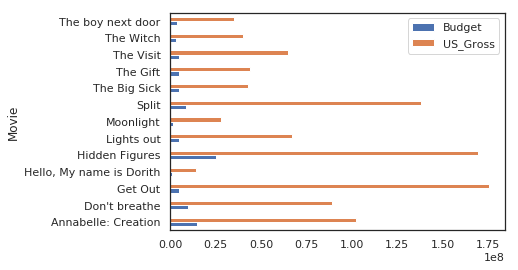

In [92]:
tops = tops.where((tops.Movie != 'Logan') &( tops.Movie != 'It'))
tops[['Budget','US_Gross', 'Movie']].groupby(['Movie']).agg('mean').plot.barh()

plt.show()

In [95]:
profit[(profit['US_Gross'] >300000000)&(profit.Budget<90000000)]

#movies that earned a lot of money, but that don't have the highest profitability rates.

,Movie,US_Gross,Budget,Profitability
126,Deadpool,363024263,58000000,525.90
209,It,327235912,35000000,834.96
106,The Secret Life of Pets,368305960,75000000,391.07
63,Minions,336029560,74000000,354.09


in the next step, I'm creating a new column named Budget League in order to sort the movies in 3 groups so I can then visualise whether a movie's budget has an influence on the profitability rate or not.

In [113]:
def label_category (row):
  if row['Budget'] >= 100000000 :
    return 'above $100M'
  elif 50000000 <= row['Budget'] < 100000000 :
    return 'above $50M'
  else :
      return 'below $50M'


profit['Budget League'] = profit.apply (lambda row: label_category(row), axis=1)

def label_profit (row):
  if row['Profitability'] >= 1000 :
    return 1000
  elif 500 <= row['Profitability'] < 1000 :
    return 500
  elif 200 <= row['Profitability'] < 500 :
    return 200
  elif 100 <= row['Profitability'] < 200 :
    return 100
  elif 0 <= row['Profitability'] < 100 :
    return 200
  elif -50 <= row['Profitability'] < 0 :
    return -50
  else :
      return -100


profit['profit'] = profit.apply (lambda row: label_profit(row), axis=1)

profit.head()

,Movie,US_Gross,Budget,Profitability,Budget League,profit
257,Coco,20359729,175000000,-88.37,above $100M,-100
215,Blade Runner 2049,90383762,150000000,-39.74,above $100M,-50
251,"Three Billboards Outside Ebbing, Missouri",38764051,15000000,158.43,below $50M,100
256,Phantom Thread,12034109,35000000,-65.62,below $50M,-100
205,Dunkirk,188043731,100000000,88.04,above $100M,200


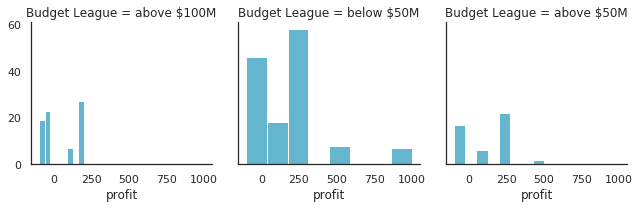

In [120]:
p = sns.FacetGrid(profit, col="Budget League")
p = p.map(plt.hist, "profit",bins=8,color="c")
plt.show()

movies with a low budget are able to have crazy profitability rates of 1,000% and higher, even if they aren't the ones that gross the largest amount money.

In [0]:
sequels = df[df.Movie.str.contains(':') |
             df.Movie.str.contains('\d', regex=True) |
             df.Movie.str.contains('\.')]

#creating a  dataframe focused on sequels

manual cleaning of the list because the number of rows was low enough to make it possible. I removed The Hateful 8, 50 Shades of Grey, and 13th Hour, because these 3 movies aren't sequels.

In [0]:
sequels = sequels[(df.Movie.str.contains('50') == False)& 
                  (df.Movie.str.contains('8') == False) & 
                  (df.Movie.str.contains('13') == False)]


nonsequels = df[(df.Movie.str.contains(':') == False) &
                (df.Movie.str.contains('\d', regex=True) == False) & 
                (df.Movie.str.contains('\.') == False)]

In [112]:
print (sequels.shape[0],'movies in the Sequel list: \n')
sequels.Movie

41 movies in the Sequel list. 



215                                   Blade Runner 2049
214                                      Thor: Ragnarok
3                                    Mad Max :Fury Road
2                          Star Wars: the Force Awakens
128                          Captain America: Civil War
203                      Guardians of the Galaxy Vol. 2
1                                             Furious 7
208                                John Wick: Chapter 2
204                              Spider-Man: Homecoming
248                            Star Wars: The Last Jedi
174                                     The Conjuring 2
28                     Mission Impossible: Rogue Nation
199                                  20th century woman
231                                    T2 Trainspotting
166                                 10 Cloverfield lane
252                      Jumanji: Welcome to the Jungle
223                         Kingsman: The Golden Circle
124                                   X-men. Apo

In [109]:
sequels_average_gross = sum(sequels.US_Gross)/len(sequels.US_Gross)
non_sequel_average_gross = sum(nonsequels.US_Gross)/len(nonsequels.US_Gross)

difference = sequels_average_gross - non_sequel_average_gross
message = f'on average, a sequel / movie that\'s part of a series earns US$ {round(difference,0)} \n more than other movies.'
print (message)

on average, a sequel / movie that's part of a series earns US$ 77638645.0 
 more than other movies.
